<H1>Rubber band dynamics I: Random walk</H1>

(Sethna, "Entropy, Order Parameters, and Complexity", ex. XXX)

© 2024, James Sethna, all rights reserved.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Exercise 5.12 introduced an entropic model for a rubber band -
$N$ segments of length $d$ pointing forward and backward at random.
Here we shall consider the fluctuations of this entropic rubber band,
as the individual segments flip back and forth. We shall also examine
how it evolves when its endpoint is pulled by an external parabolic
potential.

How does the length evolve in time, in the absence of a force from the parabolic potential?
Consider flipping one of the segments at random. If we choose one of the
$n_+$ segments pointing forward, flipping it will decrease the length $L$ by
$2d$. Conversely, flipping one of the $n_- = N-n_+$ segments will increase
the length. For convenience, let us set $d=1$ for the simulation. We also measure
time in sweeps (attempting to flip each segment once), so $\Delta t = 1/N$ 
each time a step in our random walk is taken.


(a) <em> What are $n_+$ and $n_-$ in terms of $L$ and $N$?
Write a routine flip(L,N) that, with probability $n_+/N$
returns $L-2$, and with probability $n_-/N$ returns $L+2$. Assume our
chain starts out with its endpoint at the origin, $L=0$. Plot the
evolution of the length with time, for a chain length $N=100$ and for
$10{,}000$ steps (to time $t=100$). Does the random walk drift away at long times?
</em>

<span style="color: red;">
    
Your answer here (or in a separate writeup). Double click to edit. Latex works too ($E=m c^2$).

In [ ]:
def flip(L, N):
    """
    """
    if np.random.random() < ...:
        return L+2
    else:
        return ...
        
def IterateFlips(N, nSteps, L0=0):
    L = L0
    traj = [L]
    for n in range(nSteps):
        L = flip(L, N)
        traj.append(...)
    Delta_t = ...;
    ts = Delta_t * np.arange(nSteps+1)
    return ts, traj

In [ ]:
N = 100;
alpha = 0;
ts, trajectory = IterateFlips(..., ...);
plt.plot(ts, trajectory)

In Exercise 5.12, we calculated the spring constant $K$ for the
entropic chain. Examine your solution (or the answer key) for that exercise.
At a temperature $T$, our rubber band should mostly explore only configurations where
the free energy $(1/2) K L^2$ is not much larger than $T$.


(b) <em> Use equipartition and $K$ from Exercise 5.12 
to derive a formula for the average mean square 
$\langle L^2 \rangle$ expected for a chain of length $N$. Compare
this with that of your simulated random walk.
</em>
(Hint: Your answer should not depend on the temperature! And the equipartition answer should agree with the length of a random walk with stepsize $\pm 1$.)

<span style="color: red;">
    
Your answer here (or in a separate writeup). Double click to edit. Latex works too ($E=m c^2$).

In [ ]:
print("Mean square is ", np.average(np.array(...)**...), "compare to analytical answer = ", ...)

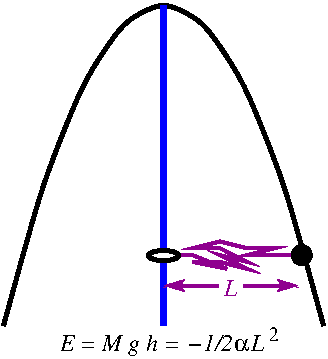

Rubber band stretched by weight on a hill. We place the endpoint
of the spring (disk at $L$) in a parabolic potential $-(1/2) \alpha L^2$, as
suggested by this schematic diagram.

We could now add an external constant force $F$, and see the spring stretch
numerically, as we studied theoretically in Exercises 5.12, 6,16, and 6.17.
Instead, let us consider adding a repulsive external quadratic potential $E(L) = -(1/2) \alpha L^2$ to the endpoint. 
(This will be motivated later as the interaction between
spins in an infinite-range Ising model.)
For simplicity, we shall measure energies in units of $k_B T$, or equivalently we set $k_B T = 1$. 

Now, when we flip a segment, we increase or decrease the energy
from $E(L)$ to $E(L\pm 2)$. It is natural to do this by equilibrating
the two orientations of the segment, the 'heat bath' algorithm.
(As it happens, our method in part (a) implements the
'Metropolis' algorithm.)
Let us focus first on equilibrating a rightward-pointing segment.
We want the segment directions after the step to have relative probabilities
given by the Boltzmann distribution, which depends on $E(L) - E(L-2)$.


(c) <em> What is the partition function $Z$ for the two states of
an initially rightward-pointing segment? What is the probability that it will
shift to point left?
</em>


<span style="color: red;">
    
Your answer here. Double click to edit. 

Our rubber band only has even lengths.  Let $L$ be an even integer,
and $P^+(L)$ be the probability that a chain of length $L$ will flip
one of its leftward-pointing segments to make it shift to a length $L+2$.
Similarly, let $P^-(L)$ be the probability per flip that $L$ will shift
to $L-2$.


(d) <em> Show that
\begin{align}
P^+(L) &= \left(\frac{N-L}{2N}\right)
                 \frac{1}{1+\exp\left(E(L+2) - E(L)\right)}\\
P^-(L) &= \left(\frac{N+L}{2N}\right)
                 \frac{1}{1+\exp\left(E(L-2) - E(L)\right)}.
\end{align}
Show that, for no external force, the heat bath time step does nothing
half the time.
</em>
(The Metropolis algorithm of part (a) is more efficient, but less physical.)

<span style="color: red;">
    
Your answer here. Double click to edit. 

(e) <em>Adapt your routine to flip(L,N,$\alpha$), that
with probability $P^+(L)$ returns $L+2$, with probability $P^-(L)$
returns $L-2$, and otherwise returns $L$.
Check it by running with $\alpha=0$. Explore different
values of $\alpha$. At what value $\alpha_c$ does the
external repulsion balance the entropic spring force? Does the behavior
change qualitatively as you go above $\alpha_c$?
</em>

In [ ]:
def E(L,alpha):
    return -...

def Pplus(L,N,alpha):
    return (...) * (1/(1+np.exp(E(...)-...)))

def Pminus(L,N,alpha):
    return ...

def HeatBathFlip(L, N, alpha):
    """
    """
    r = np.random.random()
    if r < Pplus(L,N,alpha):
        return L+2
    elif r < Pplus(...)+Pminus(...):
        return ...
    else:
       ...
        
def IterateHBFlips(N, alpha, nSteps, L0=0):
    L = L0
    traj = ...
    for n in range(nSteps):
        ...
    Delta_t = ...;
    ts = ...
    return ts, traj

In [ ]:
N = 100;
alpha = 0.0;
ts, trajectory = IterateHBFlips(N,alpha,20000);
plt.plot(ts,trajectory)

In [ ]:
...

In [ ]:
...

<span style="color: red;">
    
Your answer here. Double click to edit. 